In [39]:
import ORdmm_Land_em_coupling as model
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import sys
import seaborn as sns
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from joypy import joyplot

In [40]:
drug_h = [
        "dofetilide",
        "quinidine",
        "bepridil",
        "sotalol",
        "azimilide",
        "ibutilide",
        "vandetanib",
        "disopyramide",
    ]
drug_i = [
    "chlorpromazine",
    "cisapride",
    "ondansetron",
    "terfenadine",
    "astemizole",
    "clozapine",
    "domperidone",
    "droperidol",
    "pimozide",
    "risperidone",
]
drug_n = [
    "verapamil",
    "diltiazem",
    "mexiletine",
    "ranolazine",
    "loratadine",
    "metoprolol",
    "nifedipine",
    "nitrendipine",
    "tamoxifen",
    "clarithromycin",
]
drugs = [
    'azimilide',
    'bepridil',
    'disopyramide',
    'dofetilide',
    'ibutilide',
    'quinidine',
    'sotalol',
    'vandetanib',
    'astemizole',
    'chlorpromazine',
    'cisapride',
    'clozapine',
    'domperidone',
    'droperidol',
    'ondansetron',
    'pimozide',
    'risperidone',
    'terfenadine',
    'clarithromycin',
    'diltiazem',
    'loratadine',
    'metoprolol',
    'mexiletine',
    'nifedipine',
    'nitrendipine',
    'ranolazine',
    'tamoxifen',
    'verapamil'
    ]

In [61]:
mech_type = 'iso'
hf_type = 'control'
drug = drug_i


dfs = []
baseline_df = pd.read_csv(f'drug/df_drug_baseline_{mech_type}_{hf_type}.csv')
dfs.append(baseline_df)

for d in drug:
    drug_df = pd.read_csv(f'drug/df_drug_{d}_{mech_type}_{hf_type}.csv')
    dfs.append(drug_df)
    
all_dfs = pd.concat(dfs)

all_dfs.loc[all_dfs['drug_type'].isin(drug_h), 'risk'] = 'high'
all_dfs.loc[all_dfs['drug_type'].isin(drug_i), 'risk'] = 'intermediate'
all_dfs.loc[all_dfs['drug_type'].isin(drug_n), 'risk'] = 'none/low'
all_dfs.loc[all_dfs['drug_type']=='baseline', 'risk'] = 'baseline'


Text(0.5, 1.0, 'Ridgeline Plot, multiple groups')

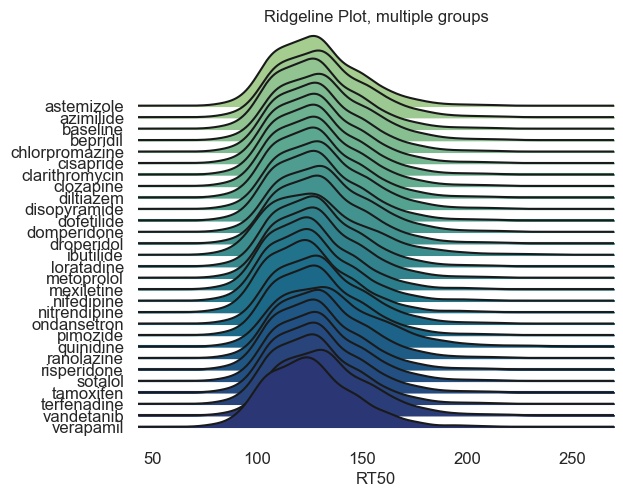

In [33]:

joyplot(
        all_dfs, 
        by='drug_type',
        column='RT50', 
        colormap=sns.color_palette("Reds", as_cmap=True) if 'drug_type' in drug_h else sns.color_palette("crest", as_cmap=True))
plt.xlabel('RT50')
plt.title("Ridgeline Plot, multiple groups")

In [89]:
mech_type='iso'
hf_type='control'

full_df = pd.read_csv(f'/Users/agathebyraaum/Documents/diff_drug_full_{mech_type}_{hf_type}.csv')
print(full_df.head())

   Unnamed: 0          Drug   APD90_m  APD90_sd  APD90_min  APD90_max  \
0           0      baseline  263.3575    1.0749      260.6      267.6   
1           1     azimilide  290.7115    1.1436      287.4      294.8   
2           2      bepridil  294.3966    1.1580      291.0      298.4   
3           3  disopyramide  282.6922    1.1114      279.6      286.8   
4           4    dofetilide  267.3564    0.9919      264.7      271.2   

   Tri90-30_m  Tri90-30_sd  Tri90-30_min  Tri90-30_max  ...  RT50_min  \
0     92.9984       0.5155          90.6          93.6  ...      79.9   
1    106.3929       0.6309         103.2         107.1  ...      80.6   
2    108.6099       0.6448         105.3         109.3  ...      80.7   
3    102.8237       0.5985          99.9         103.5  ...      80.5   
4     95.5418       0.5513          92.9          96.2  ...      79.7   

   RT50_max     EmW_m   EmW_sd  EmW_min  EmW_max    qNet_m  qNet_sd  qNet_min  \
0     213.6  192.6564  46.1531     87.9  

In [90]:
full_df.drop(full_df.columns[[0]], axis=1, inplace=True)
full_df


,Drug,APD90_m,APD90_sd,APD90_min,APD90_max,Tri90-30_m,Tri90-30_sd,Tri90-30_min,Tri90-30_max,CaTA_m,...,RT50_min,RT50_max,EmW_m,EmW_sd,EmW_min,EmW_max,qNet_m,qNet_sd,qNet_min,qNet_max
0,baseline,263.3575,1.0749,260.6,267.6,92.9984,0.5155,90.6,93.6,0.4042,...,79.9,213.6,192.6564,46.1531,87.9,376.2,496.4423,5.0233,482.8886,513.5709
1,azimilide,290.7115,1.1436,287.4,294.8,106.3929,0.6309,103.2,107.1,0.4176,...,80.6,218.5,169.6765,46.0192,65.3,352.1,436.9514,1.9495,430.9645,442.1400
2,bepridil,294.3966,1.1580,291.0,298.4,108.6099,0.6448,105.3,109.3,0.4187,...,80.7,219.0,166.4663,45.9907,62.2,348.8,429.5191,1.9349,423.6349,434.7070
3,disopyramide,282.6922,1.1114,279.6,286.8,102.8237,0.5985,99.9,103.5,0.4153,...,80.5,217.1,176.3155,46.0809,71.7,359.0,468.8339,2.0623,462.4675,474.4001
4,dofetilide,267.3564,0.9919,264.7,271.2,95.5418,0.5513,92.9,96.2,0.4039,...,79.7,214.1,189.1577,46.2596,84.2,373.1,481.6601,2.0032,475.3859,487.0553
5,ibutilide,616.0193,4.2768,604.6,625.2,344.7730,2.5295,337.5,348.9,0.4344,...,78.2,237.6,4.2864,28.8048,-64.5,122.5,47.4830,1.1404,44.9776,51.2871
6,quinidine,442.7620,3.1078,432.8,449.8,207.2506,0.9012,203.0,208.2,0.4471,...,81.6,236.7,49.3924,41.2972,-43.5,217.2,284.2532,0.6195,283.4238,286.7280
7,sotalol,271.3935,1.0154,268.6,275.3,96.8658,0.5756,94.1,97.6,0.4092,...,80.1,215.1,185.9480,46.2117,81.1,369.4,477.5658,2.0247,471.2428,483.0225
8,vandetanib,302.0614,1.2046,298.4,306.2,112.6298,0.6644,109.2,113.3,0.4261,...,81.2,220.5,160.2577,45.8829,56.3,341.8,412.5357,1.9531,406.6703,417.8179
9,astemizole,265.4613,0.9725,262.9,269.3,94.0179,0.5544,91.4,94.7,0.4056,...,79.9,214.0,190.9082,46.2682,85.9,374.7,491.1769,2.0251,484.8231,496.6505


In [111]:
biomarkers = ['qNet']
#'APD90', 'Tri90-30', 'CaTA', 'CaTD80', 'DevF', 'RT50', 'EmW', 'qNet'
from math import sqrt

for d in drugs:
    for b in biomarkers:
        control_m = full_df[full_df['Drug']=='baseline'][f'{b}_m'].values[0]
        treatment_m = full_df[full_df['Drug']==f'{d}'][f'{b}_m'].values[0]
        control_sd = full_df[full_df['Drug']=='baseline'][f'{b}_sd'].values[0]
        treatment_sd = full_df[full_df['Drug']==f'{d}'][f'{b}_sd'].values[0]

        smd = (control_m-treatment_m)/sqrt(control_sd**2+treatment_sd**2)
        print(f'{d}: {round(smd,2)}')


azimilide: 11.04
bepridil: 12.43
disopyramide: 5.08
dofetilide: 2.73
ibutilide: 87.16
quinidine: 41.92
sotalol: 3.49
vandetanib: 15.57
astemizole: 0.97
chlorpromazine: 3.55
cisapride: 3.0
clozapine: 2.2
domperidone: 12.61
droperidol: 6.62
ondansetron: 6.29
pimozide: 1.54
risperidone: 0.34
terfenadine: -0.02
clarithromycin: 0.61
diltiazem: -0.17
loratadine: 0.14
metoprolol: -1.94
mexiletine: -12.21
nifedipine: -4.39
nitrendipine: -4.98
ranolazine: 11.25
tamoxifen: 0.88
verapamil: 1.19


In [194]:
#paired difference

mech_type='iso'
hf_type='control'

dfs = []

baseline_df = pd.read_csv(f'drug/df_drug_baseline_{mech_type}_{hf_type}.csv')

for d in drugs:
        drug_df = pd.read_csv(f'drug/df_drug_{d}_{mech_type}_{hf_type}.csv')
        dfs.append(drug_df)

In [195]:
APD_90_base = baseline_df['APD_90']
Tri_90_30_base = baseline_df['Tri90_30']
CaTA_base = baseline_df['CaTA']
CaTD_80_base = baseline_df['CaTD_80']
DevF_base = baseline_df['DevF']
RT50_base = baseline_df['RT50']
qNet_base = baseline_df['qNet']
EmW_base = baseline_df['CaTD_90']-baseline_df['APD_90']

paired_diff = []

for i in range(len(dfs)):

    diff_APD_90 = APD_90_base - dfs[i]['APD_90']
    diff_Tri90_30 = Tri_90_30_base - dfs[i]['Tri90_30']
    diff_CaTA = CaTA_base - dfs[i]['CaTA']
    diff_CaTD_80 = CaTD_80_base - dfs[i]['CaTD_80']
    diff_DevF = DevF_base - dfs[i]['DevF']
    diff_RT50 = RT50_base - dfs[i]['RT50']
    diff_qNet = qNet_base - dfs[i]['qNet']
    diff_EmW = EmW_base - (dfs[i]['CaTD_90']-dfs[i]['APD_90'])

    new_d = {
        'Drug': dfs[i]['drug_type'][1],
        'APD90_SMD': f'{round((diff_APD_90.mean()/diff_APD_90.std()), 0)}',

        'Tri90-30_SMD': f'{round((diff_Tri90_30.mean()/diff_Tri90_30.std()), 0)}',

        'CaTA_SMD': f'{round((diff_CaTA.mean()/diff_CaTA.std()), 0)}',

        'CaTD80_SMD': f'{round((diff_CaTD_80.mean()/diff_CaTD_80.std()), 0)}',

        'DevF_SMD': f'{round((diff_DevF.mean()/diff_DevF.std()), 0)}',

        'RT50_SMD': f'{round((diff_RT50.mean()/diff_RT50.std()), 0)}',

        'EmW_SMD': f'{round((diff_qNet.mean()/diff_qNet.std()), 0)}',

        'qNet_SMD': f'{round((diff_EmW.mean()/diff_EmW.std()), 0)}',
    }
    paired_diff.append(new_d)

paired_diff_df = pd.DataFrame(paired_diff)


print(paired_diff_df.to_latex(index=False))

\begin{tabular}{lllllllll}
\toprule
          Drug & APD90\_SMD & Tri90-30\_SMD & CaTA\_SMD & CaTD80\_SMD & DevF\_SMD & RT50\_SMD & EmW\_SMD & qNet\_SMD \\
\midrule
     azimilide &    -263.0 &       -100.0 &    -10.0 &      -28.0 &     -4.0 &     -2.0 &    19.0 &    149.0 \\
      bepridil &    -254.0 &       -105.0 &    -10.0 &      -28.0 &     -4.0 &     -2.0 &    22.0 &    146.0 \\
  disopyramide &    -263.0 &        -94.0 &    -12.0 &      -23.0 &     -4.0 &     -2.0 &     9.0 &    158.0 \\
    dofetilide &     -43.0 &        -39.0 &      1.0 &      -11.0 &      1.0 &     -2.0 &     5.0 &     29.0 \\
     ibutilide &    -109.0 &        -84.0 &    -11.0 &       -2.0 &     -4.0 &     -0.0 &    73.0 &     11.0 \\
     quinidine &     -87.0 &        -93.0 &    -11.0 &      -11.0 &     -4.0 &     -1.0 &    48.0 &     29.0 \\
       sotalol &    -109.0 &        -45.0 &    -20.0 &      -19.0 &     -4.0 &     -2.0 &     6.0 &     76.0 \\
    vandetanib &    -231.0 &       -115.0 &     -9.

/var/folders/nj/yp77vn2n6p59nhppy3ml0j500000gn/T/ipykernel_8481/652466071.py:46: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.


In [196]:
APD_90_base = baseline_df['APD_90']
Tri_90_30_base = baseline_df['Tri90_30']
CaTA_base = baseline_df['CaTA']*1000
CaTD_80_base = baseline_df['CaTD_80']
DevF_base = baseline_df['DevF']
RT50_base = baseline_df['RT50']
qNet_base = baseline_df['qNet']
EmW_base = baseline_df['CaTD_90']-baseline_df['APD_90']

paired_diff = []

for i in range(len(dfs)):

    diff_APD_90 =  dfs[i]['APD_90'][0:100] - APD_90_base[0:100] 
    diff_Tri90_30 =  dfs[i]['Tri90_30'][0:100] - Tri_90_30_base[0:100]
    diff_CaTA =  dfs[i]['CaTA'][0:100]*1000 - CaTA_base[0:100]
    diff_CaTD_80 =  dfs[i]['CaTD_80'][0:100] - CaTD_80_base[0:100]
    diff_DevF =  dfs[i]['DevF'][0:100] - DevF_base[0:100]
    diff_RT50 =  dfs[i]['RT50'][0:100] - RT50_base[0:100]
    diff_qNet =  dfs[i]['qNet'][0:100] - qNet_base[0:100]
    diff_EmW =  (dfs[i]['CaTD_90']-dfs[i]['APD_90'])[0:100] - EmW_base[0:100]

    new_d = {
        'Drug': dfs[i]['drug_type'][1],
        'APD90_m': f'{round(diff_APD_90.mean(),0)}',
        'APD90_sd': f'{round(diff_APD_90.std(),2)}',

        'Tri90-30_m': f'{round(diff_Tri90_30.mean(),0)}',
        'Tri90-30_sd': f'{round(diff_Tri90_30.std(),2)}',

        'CaTA_m': f'{round(diff_CaTA.mean(),2)}',
        'CaTA_sd': f'{round(diff_CaTA.std(),2)}',

        'CaTD80_m': f'{round(diff_CaTD_80.mean(),0)}',
        'CaTD80_sd': f'{round(diff_CaTD_80.std(),2)}',

        'DevF_m': f'{round(diff_DevF.mean(),0)}',
        'DevF_sd': f'{round(diff_DevF.std(),2)}',

        'RT50_m': f'{round(diff_RT50.mean(),0)}',
        'RT50_sd': f'{round(diff_RT50.std(),2)}',
        
        'EmW_m': f'{round(diff_qNet.mean(),0)}',
        'EmW_sd': f'{round(diff_qNet.std(),2)}',

        'qNet_m': f'{round(diff_EmW.mean(),0)}', 
        'qNet_sd': f'{round(diff_EmW.std(),2)}', 
    }
    paired_diff.append(new_d)

paired_diff_df = pd.DataFrame(paired_diff)


paired_diff_df.head(28)

,Drug,APD90_m,APD90_sd,Tri90-30_m,Tri90-30_sd,CaTA_m,CaTA_sd,CaTD80_m,CaTD80_sd,DevF_m,DevF_sd,RT50_m,RT50_sd,EmW_m,EmW_sd,qNet_m,qNet_sd
0,azimilide,27.0,0.1,13.0,0.15,0.01,0.0,4.0,0.15,2.0,0.42,3.0,1.2,-60.0,3.28,-23.0,0.16
1,bepridil,31.0,0.12,16.0,0.17,0.01,0.0,5.0,0.18,2.0,0.45,3.0,1.32,-67.0,3.29,-26.0,0.19
2,disopyramide,19.0,0.07,10.0,0.11,0.01,0.0,3.0,0.13,1.0,0.36,2.0,0.85,-28.0,3.16,-16.0,0.11
3,dofetilide,4.0,0.1,3.0,0.07,-0.0,0.0,1.0,0.05,-0.0,0.05,0.0,0.16,-15.0,3.22,-3.0,0.13
4,ibutilide,353.0,3.35,252.0,3.1,0.03,0.0,102.0,46.69,3.0,0.68,2.0,4.84,-449.0,6.45,-190.0,18.48
5,quinidine,179.0,2.12,114.0,1.23,0.04,0.0,31.0,2.65,5.0,1.21,7.0,4.75,-212.0,4.64,-144.0,5.16
6,sotalol,8.0,0.08,4.0,0.09,0.0,0.0,1.0,0.07,1.0,0.18,1.0,0.38,-19.0,3.2,-7.0,0.09
7,vandetanib,39.0,0.16,20.0,0.18,0.02,0.0,6.0,0.27,3.0,0.66,4.0,1.69,-84.0,3.27,-32.0,0.31
8,astemizole,2.0,0.11,1.0,0.06,0.0,0.0,0.0,0.05,0.0,0.08,0.0,0.13,-5.0,3.2,-2.0,0.13
9,chlorpromazine,9.0,0.08,5.0,0.1,0.01,0.0,1.0,0.07,1.0,0.18,1.0,0.41,-19.0,3.2,-8.0,0.09


In [151]:
import scipy.stats

APD_90_base = baseline_df['APD_90']
Tri_90_30_base = baseline_df['Tri90_30']
CaTA_base = baseline_df['CaTA']
CaTD_80_base = baseline_df['CaTD_80']
DevF_base = baseline_df['DevF']
RT50_base = baseline_df['RT50']
qNet_base = baseline_df['qNet']
EmW_base = baseline_df['CaTD_90']-baseline_df['APD_90']

paired_diff = []

for i in range(len(dfs)):

    diff_APD_90 = APD_90_base - dfs[i]['APD_90']
    diff_Tri90_30 = Tri_90_30_base - dfs[i]['Tri90_30']
    diff_CaTA = CaTA_base - dfs[i]['CaTA']
    diff_CaTD_80 = CaTD_80_base - dfs[i]['CaTD_80']
    diff_DevF = DevF_base - dfs[i]['DevF']
    diff_RT50 = RT50_base - dfs[i]['RT50']
    diff_qNet = qNet_base - dfs[i]['qNet']
    diff_EmW = EmW_base - (dfs[i]['CaTD_90']-dfs[i]['APD_90'])

    t_APD_90 = diff_APD_90.mean()/(diff_APD_90.std()/sqrt(1000))
    t_Tri90_30 = diff_Tri90_30.mean()/(diff_Tri90_30.std()/sqrt(1000))
    t_CaTA = diff_CaTA.mean()/(diff_CaTA.std()/sqrt(1000))
    t_CaTD_80 = diff_DevF.mean()/(diff_DevF.std()/sqrt(1000))
    t_DevF = diff_DevF.mean()/(diff_DevF.std()/sqrt(1000))
    t_RT50 = diff_RT50.mean()/(diff_RT50.std()/sqrt(1000))
    t_qNet = diff_qNet.mean()/(diff_qNet.std()/sqrt(1000))
    t_EmW = diff_EmW.mean()/(diff_EmW.std()/sqrt(1000))

    scipy.stats.t.sf(abs(-.47), df=12)

    p_APD_90 = scipy.stats.t.sf(abs(t_APD_90), df=999)
    p_Tri90_30 = scipy.stats.t.sf(abs(t_Tri90_30), df=999)
    p_CaTA = scipy.stats.t.sf(abs(t_CaTA), df=999)
    p_CaTD_80 = scipy.stats.t.sf(abs(t_CaTD_80), df=999)
    p_DevF = scipy.stats.t.sf(abs(t_DevF), df=999)
    p_RT50 = scipy.stats.t.sf(abs(t_RT50), df=999)
    p_qNet = scipy.stats.t.sf(abs(t_qNet), df=999)
    p_EmW = scipy.stats.t.sf(abs(t_EmW), df=999)

    paired_diff.append(p_APD_90)
    paired_diff.append(p_Tri90_30)
    paired_diff.append(p_CaTA)
    paired_diff.append(p_CaTD_80)
    paired_diff.append(p_DevF)
    paired_diff.append(p_RT50)
    paired_diff.append(p_qNet)
    paired_diff.append(p_EmW)

count = len([i for i in paired_diff if i <= 0.001])

print(count)





223


In [159]:
import scipy.stats as stats

APD_90_base = baseline_df['APD_90']
Tri_90_30_base = baseline_df['Tri90_30']
CaTA_base = baseline_df['CaTA']
CaTD_80_base = baseline_df['CaTD_80']
DevF_base = baseline_df['DevF']
RT50_base = baseline_df['RT50']
qNet_base = baseline_df['qNet']
EmW_base = baseline_df['CaTD_90']-baseline_df['APD_90']

for i in range(30):

    diff_APD_90 = dfs[i]['APD_90']
    diff_Tri90_30 = dfs[i]['Tri90_30']
    diff_CaTA = dfs[i]['CaTA']
    diff_CaTD_80 = dfs[i]['CaTD_80']
    diff_DevF = dfs[i]['DevF']
    diff_RT50 = dfs[i]['RT50']
    diff_qNet = dfs[i]['qNet']
    diff_EmW = (dfs[i]['CaTD_90']-dfs[i]['APD_90'])

    print(stats.ttest_rel(APD_90_base, diff_APD_90))
    print(stats.ttest_rel(APD_90_base, diff_APD_90))
    print(stats.ttest_rel(APD_90_base, diff_APD_90))
    print(stats.ttest_rel(APD_90_base, diff_APD_90))
    print(stats.ttest_rel(APD_90_base, diff_APD_90))
    print(stats.ttest_rel(APD_90_base, diff_APD_90))
    print(stats.ttest_rel(APD_90_base, diff_APD_90))
    print(stats.ttest_rel(APD_90_base, diff_APD_90))

Ttest_relResult(statistic=-8317.85411193269, pvalue=0.0)
Ttest_relResult(statistic=-8317.85411193269, pvalue=0.0)
Ttest_relResult(statistic=-8317.85411193269, pvalue=0.0)
Ttest_relResult(statistic=-8317.85411193269, pvalue=0.0)
Ttest_relResult(statistic=-8317.85411193269, pvalue=0.0)
Ttest_relResult(statistic=-8317.85411193269, pvalue=0.0)
Ttest_relResult(statistic=-8317.85411193269, pvalue=0.0)
Ttest_relResult(statistic=-8317.85411193269, pvalue=0.0)
Ttest_relResult(statistic=-8031.379244997969, pvalue=0.0)
Ttest_relResult(statistic=-8031.379244997969, pvalue=0.0)
Ttest_relResult(statistic=-8031.379244997969, pvalue=0.0)
Ttest_relResult(statistic=-8031.379244997969, pvalue=0.0)
Ttest_relResult(statistic=-8031.379244997969, pvalue=0.0)
Ttest_relResult(statistic=-8031.379244997969, pvalue=0.0)
Ttest_relResult(statistic=-8031.379244997969, pvalue=0.0)
Ttest_relResult(statistic=-8031.379244997969, pvalue=0.0)
Ttest_relResult(statistic=-8327.03971558913, pvalue=0.0)
Ttest_relResult(statist

IndexError: list index out of range

In [53]:


mech_type = 'iso'
drug = drug_i


dfs = []
baseline_df_c = pd.read_csv(f'drug/df_drug_baseline_{mech_type}_control.csv')
baseline_df_hf = pd.read_csv(f'drug/df_drug_baseline_{mech_type}_gomez.csv')
dfs.append(baseline_df_c)
dfs.append(baseline_df_hf)

for d in drug:
    drug_df_c = pd.read_csv(f'drug/df_drug_{d}_{mech_type}_control.csv')
    drug_df_hf = pd.read_csv(f'drug/df_drug_{d}_{mech_type}_gomez.csv')
    dfs.append(drug_df_c)
    dfs.append(drug_df_hf)
    
all_dfs = pd.concat(dfs)

all_dfs.loc[all_dfs['drug_type'].isin(drug_h), 'risk'] = 'high'
all_dfs.loc[all_dfs['drug_type'].isin(drug_i), 'risk'] = 'intermediate'
all_dfs.loc[all_dfs['drug_type'].isin(drug_n), 'risk'] = 'none/low'
all_dfs.loc[all_dfs['drug_type']=='baseline', 'risk'] = 'baseline'


drug = drug_i


for d in drug:
    drug_df = pd.read_csv(f'drug/df_drug_{d}_{mech_type}_{hf_type}.csv')
    dfs.append(drug_df)
    
all_dfs = pd.concat(dfs)

all_dfs.loc[all_dfs['drug_type'].isin(drug_h), 'risk'] = 'high'
all_dfs.loc[all_dfs['drug_type'].isin(drug_i), 'risk'] = 'intermediate'
all_dfs.loc[all_dfs['drug_type'].isin(drug_n), 'risk'] = 'none/low'
all_dfs.loc[all_dfs['drug_type']=='baseline', 'risk'] = 'baseline'

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'baseline'),
  Text(1, 0, 'chlorpromazine'),
  Text(2, 0, 'cisapride'),
  Text(3, 0, 'ondansetron'),
  Text(4, 0, 'terfenadine'),
  Text(5, 0, 'astemizole'),
  Text(6, 0, 'clozapine'),
  Text(7, 0, 'domperidone'),
  Text(8, 0, 'droperidol'),
  Text(9, 0, 'pimozide'),
  Text(10, 0, 'risperidone')])

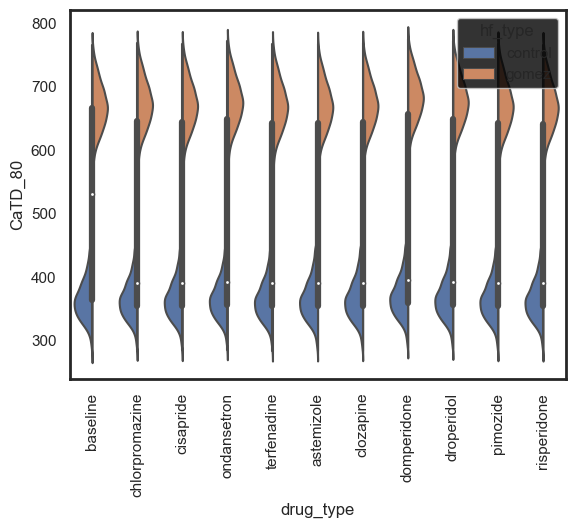

In [60]:
g = sns.violinplot(data=all_dfs, x="drug_type", y="CaTD_80", hue='hf_type', split=True)
plt.xticks(rotation=90)

## POPULATION

In [188]:
control_df = pd.read_csv(f'drug/df_drug_baseline_dyn_control.csv')
HF_df = pd.read_csv(f'drug/df_drug_baseline_dyn_gomez.csv')

DevF_base = control_df['DevF']
TTP_base = control_df['TTP']
RT50_base = control_df['RT50']
APD_90_base = control_df['APD_90']
CaTA_base = control_df['CaTA']
CaTD_80_base = control_df['CaTD_80']

DevF_base_HF = HF_df['DevF']
TTP_base_HF = HF_df['TTP']
RT50_base_HF = HF_df['RT50']
APD_90_base_HF = HF_df['APD_90']
CaTA_base_HF = HF_df['CaTA']
CaTD_80_base_HF = HF_df['CaTD_80']

#parameters = ['DevF', 'TTP', 'RT50', 'APD_90', 'CaTA', 'CaTD_80']

diff_APD90 = APD_90_base - APD_90_base_HF
diff_DevF = DevF_base - DevF_base_HF
diff_TTP = TTP_base - TTP_base_HF
diff_RT50 = RT50_base - RT50_base_HF
diff_CaTA = CaTA_base - CaTA_base_HF
diff_CaTD_80 = CaTD_80_base - CaTD_80_base_HF

"""
#get nominal value of control
print(APD_90_base.mean())
print(CaTA_base.mean()*1000)
print(CaTD_80_base.mean())
print(DevF_base.mean())
print(TTP_base.mean())
print(RT50_base.mean())

print("")

print(APD_90_base.std())
print(CaTA_base.std()*1000)
print(CaTD_80_base.std())
print(DevF_base.std())
print(TTP_base.std())
print(RT50_base.std())

print("")

#get nominal value of hf
print(APD_90_base_HF.mean())
print(CaTA_base_HF.mean()*1000)
print(CaTD_80_base_HF.mean())
print(DevF_base_HF.mean())
print(TTP_base_HF.mean())
print(RT50_base_HF.mean())

print("")

#get nominal value of hf
print(APD_90_base_HF.std())
print(CaTA_base_HF.std()*1000)
print(CaTD_80_base_HF.std())
print(DevF_base_HF.std())
print(TTP_base_HF.std())
print(RT50_base_HF.std())

""" 
print("")

#get percentage change
print(1-(APD_90_base.mean()-APD_90_base_HF.mean())/APD_90_base.mean())
print(1-(CaTA_base.mean()-CaTA_base_HF.mean())/CaTA_base.mean())
print(1-(CaTD_80_base.mean()-CaTD_80_base_HF.mean())/CaTD_80_base.mean())
print(1-(DevF_base.mean()-DevF_base_HF.mean())/DevF_base.mean())
print(1-(TTP_base.mean()-TTP_base_HF.mean())/TTP_base.mean())
print(1-(RT50_base.mean()-RT50_base_HF.mean())/RT50_base.mean())


print("")

#get percentage change on paired data
print((1-(APD_90_base-APD_90_base_HF)/APD_90_base).mean())
print((1-(CaTA_base-CaTA_base_HF)/CaTA_base).mean())
print((1-(CaTD_80_base-CaTD_80_base_HF)/CaTD_80_base).mean())
print((1-(DevF_base-DevF_base_HF)/DevF_base).mean())
print((1-(TTP_base-TTP_base_HF)/TTP_base).mean())
print((1-(RT50_base-RT50_base_HF)/RT50_base).mean())





1.3253530957732114
0.29334386326423867
1.7667772773987656
0.3822822307747875
1.6869132649368654
1.1886523566138096

1.3253569380316923
0.2937428729769078
1.7680383680821492
0.37700922287170885
1.6929586393574694
1.203678888983051


##TESTING NEW QUINIDINE

In [191]:
#paired difference

mech_type='iso'
hf_type='control'

emer = ['quinidine_EMERGENCY_TEST']

dfs = []

baseline_df = pd.read_csv(f'drug/df_drug_baseline_{mech_type}_{hf_type}.csv')

for d in emer:
        drug_df = pd.read_csv(f'drug/df_drug_{d}_{mech_type}_{hf_type}.csv')
        dfs.append(drug_df)

APD_90_base = baseline_df['APD_90']
Tri_90_30_base = baseline_df['Tri90_30']
CaTA_base = baseline_df['CaTA']*1000
CaTD_80_base = baseline_df['CaTD_80']
DevF_base = baseline_df['DevF']
RT50_base = baseline_df['RT50']
qNet_base = baseline_df['qNet']
EmW_base = baseline_df['CaTD_90']-baseline_df['APD_90']

paired_diff = []

for i in range(len(dfs)):

    diff_APD_90 =  dfs[i]['APD_90'] - APD_90_base[0:100] 
    diff_Tri90_30 =  dfs[i]['Tri90_30'] - Tri_90_30_base[0:100] 
    diff_CaTA =  dfs[i]['CaTA']*1000 - CaTA_base[0:100] 
    diff_CaTD_80 =  dfs[i]['CaTD_80'] - CaTD_80_base[0:100] 
    diff_DevF =  dfs[i]['DevF'] - DevF_base[0:100] 
    diff_RT50 =  dfs[i]['RT50'] - RT50_base[0:100] 
    diff_qNet =  dfs[i]['qNet'] - qNet_base[0:100] 
    diff_EmW =  (dfs[i]['CaTD_90']-dfs[i]['APD_90']) - EmW_base[0:100] 

    new_d = {
        'Drug': dfs[i]['drug_type'][1],
        'APD90_m': f'{round(diff_APD_90.mean(),0)}',
        'APD90_sd': f'{round(diff_APD_90.std(),2)}',

        'Tri90-30_m': f'{round(diff_Tri90_30.mean(),0)}',
        'Tri90-30_sd': f'{round(diff_Tri90_30.std(),2)}',

        'CaTA_m': f'{round(diff_CaTA.mean(),2)}',
        'CaTA_sd': f'{round(diff_CaTA.std(),2)}',

        'CaTD80_m': f'{round(diff_CaTD_80.mean(),0)}',
        'CaTD80_sd': f'{round(diff_CaTD_80.std(),2)}',

        'DevF_m': f'{round(diff_DevF.mean(),0)}',
        'DevF_sd': f'{round(diff_DevF.std(),2)}',

        'RT50_m': f'{round(diff_RT50.mean(),0)}',
        'RT50_sd': f'{round(diff_RT50.std(),2)}',
        
        'EmW_m': f'{round(diff_qNet.mean(),0)}',
        'EmW_sd': f'{round(diff_qNet.std(),2)}',

        'qNet_m': f'{round(diff_EmW.mean(),0)}', 
        'qNet_sd': f'{round(diff_EmW.std(),2)}', 
    }
    paired_diff.append(new_d)

paired_diff_df = pd.DataFrame(paired_diff)


paired_diff_df.head(28)

,Drug,APD90_m,APD90_sd,Tri90-30_m,Tri90-30_sd,CaTA_m,CaTA_sd,CaTD80_m,CaTD80_sd,DevF_m,DevF_sd,RT50_m,RT50_sd,EmW_m,EmW_sd,qNet_m,qNet_sd
0,quinidine_EMERGENCY_TEST,188.0,1.13,120.0,1.11,-0.04,0.0,46.0,2.83,-5.0,1.26,2.0,5.65,-414.0,4.87,-138.0,5.75
